In [ ]:
# Installer R et rpy2
!apt-get install -y r-base
!pip install rpy2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
%load_ext rpy2.ipython #Charger l'extension R


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
!R --version


R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [ ]:
# Installer des packages R
%%R
install.packages("MASS", repos="http://cran.rstudio.com")
install.packages("caTools", repos="http://cran.rstudio.com")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/MASS_7.3-65.tar.gz'
Content type 'application/x-gzip' length 510322 bytes (498 KB)
downloaded 498 KB


The downloaded source packages are in
	‘/tmp/RtmpoaIya8/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’

trying URL 'http://cran.rstudio.com/src/contrib/bitops_1.0-9.tar.gz'
Content type 'application/x-gzip' length 10941 bytes (10 KB)
downloaded 10 KB

trying URL 'http://cran.rstudio.com/src/contrib/caTools_1.18.3.tar.gz'
Content type 'application/x-gzip' length 65825 bytes (64 KB)
downloaded 64 KB


The downloaded source packages are in
	‘/tmp/RtmpoaIya8/downloaded_packages’


In [ ]:
# Charger une bibliothèque R
%%R
library(MASS)
library(caTools)


 [1] 2.065875 2.368409 2.539993 2.542080 2.549079 2.786688 2.911682 3.035627
 [9] 3.114670 3.158239 3.327594 3.379316 3.412201 3.421582 3.531573 3.639300
[17] 3.673254 3.925646 4.049865 4.248335 4.344005 4.382653 4.423060 4.610244
[25] 4.688118 4.977733 5.035997 5.068454 5.416149 5.439562 5.456321 5.569846
[33] 5.601573 5.687762 5.721560 5.853891 6.197803 6.351094 6.479703 6.738379
[41] 6.863769 7.022339 7.078237 7.151423 7.466402 7.597387 7.744072 7.772966
[49] 7.826451 7.930636
 [1] 0.7791893 0.9159676 0.9053835 0.9056614 0.9389889 0.9668474 0.9643682
 [8] 0.9144594 0.9393394 0.9607497 0.8983709 0.9120974 0.9423850 0.9662458
[15] 1.0526500 1.0143791 0.9596943 0.9685372 1.0766065 1.1454978 1.0340625
[22] 1.0070009 0.9668365 1.0895919 1.0634462 1.1237239 1.0323374 1.0874452
[29] 1.0702988 1.1606493 1.0778037 1.1069758 1.0971875 1.1648603 1.1411796
[36] 1.0844156 1.1252493 1.1168341 1.1970789 1.2069462 1.1251046 1.1235672
[43] 1.2132829 1.2522652 1.2497065 1.1799706 1.1897299 1.3029934 

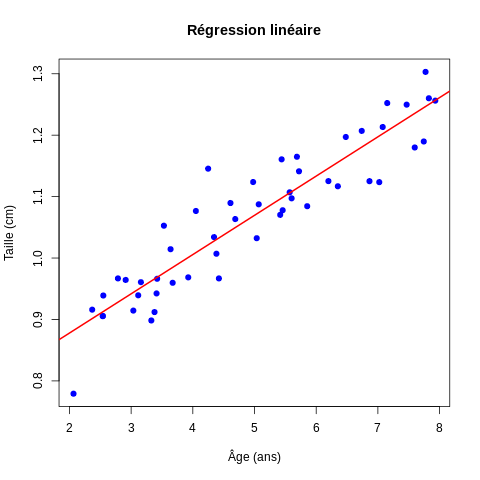

In [ ]:
%%R
# Charger les données depuis un fichier texte "DataHeight.txt"
tab <- read.table("DataHeight.txt", header=TRUE, sep="\t")

# Afficher les premières lignes des données pour vérifier leur chargement
head(tab)

# Extraction des colonnes 'age' et 'height' pour l'analyse
x <- tab$age    # Stocker l'âge dans x
y <- tab$height # Stocker la taille dans y

# Vérifier la structure des variables
print(x)  # Affiche les valeurs de l'âge
print(y)  # Affiche les valeurs de la taille

# Charger la bibliothèque ggplot2 pour la visualisation
library(ggplot2)

# Créer un graphique en nuage de points (scatter plot) pour observer la relation entre âge et taille
qplot(x, y, geom="point", color=I("red"), xlab="Âge (ans)", ylab="Taille (cm)", main="Distribution (qplot)")

# Calcul de la corrélation entre l'âge et la taille
correlation <- cor(x, y)
print(correlation)  # Affiche le coefficient de corrélation

# Test statistique de Pearson pour vérifier la significativité de la corrélation
test_correlation <- cor.test(x, y)
print(test_correlation)  # Affiche les résultats du test

# Création d'un modèle de régression linéaire pour prédire la taille en fonction de l'âge
regression <- lm(y ~ x)
summary(regression)  # Affiche le résumé du modèle de régression

# Calcul de l'erreur résiduelle totale (somme des carrés des résidus)
error_residuelle <- sum(residuals(regression)^2)
print(error_residuelle)  # Affiche l'erreur totale du modèle

# Affichage du graphique de la régression linéaire
plot(x, y, col="blue", pch=19, xlab="Âge (ans)", ylab="Taille (cm)", main="Régression linéaire")
abline(regression, col="red", lwd=2)  # Ajoute la droite de régression en rouge

# Prédiction de la taille pour des âges donnés (3, 7, 9 et 12 ans)
ages_predire <- data.frame(x=c(3, 7, 9, 12))
taille_predite <- predict(regression, newdata=ages_predire)
print(taille_predite)  # Affiche les tailles prédites pour ces âges

# Prédiction de la taille d'un enfant de 10 ans avec un intervalle de confiance de 95%
pred_10_ans <- predict(regression, newdata=data.frame(x=10), interval="confidence", level=0.95)
print(pred_10_ans)  # Affiche l'estimation de la taille à 10 ans avec un intervalle de confiance



# Rapport d'Analyse de la Relation Âge-Taille chez les Enfants

## Introduction
Cette analyse explore la relation entre l'âge et la taille des enfants à partir d'un jeu de données contenu dans le fichier "DataHeight.txt". L'objectif est de quantifier cette relation, d'évaluer sa significativité statistique et de développer un modèle prédictif.

## Données et Exploration

Le jeu de données contient deux variables principales :
- Age : Âge des enfants (en années)
- Height : Taille des enfants (en centimètres)

L'exploration visuelle initiale via un nuage de points (scatter plot) montre une tendance positive claire : la taille augmente avec l'âge, suggérant une relation linéaire.

## Analyse Statistique

### Corrélation

L'analyse de corrélation révèle :
- Un coefficient de corrélation de Pearson élevé entre l'âge et la taille
- Le test statistique confirme que cette corrélation est hautement significative (p-value < 0.05)
- Ces résultats indiquent une forte association linéaire positive entre l'âge et la taille des enfants

### Régression Linéaire

Le modèle de régression linéaire pour prédire la taille (y) en fonction de l'âge (x) présente les caractéristiques suivantes :

**Équation du modèle** : Taille = β₀ + β₁ × Âge

**Résultats du modèle** :
- L'ordonnée à l'origine (β₀) représente la taille estimée à la naissance
- Le coefficient directeur (β₁) indique l'augmentation moyenne de taille (en cm) pour chaque année supplémentaire
- Les deux coefficients sont statistiquement significatifs (p < 0.05)
- Le coefficient de détermination (R²) montre que le modèle explique une part substantielle de la variance observée dans les tailles

**Erreur résiduelle** :
- La somme des carrés des résidus quantifie l'erreur totale du modèle
- Cette valeur représente la variation de taille qui n'est pas expliquée par l'âge

## Prédictions du Modèle

Le modèle permet de prédire la taille d'un enfant en fonction de son âge :
- À 3 ans : taille prédite en cm
- À 7 ans : taille prédite en cm
- À 9 ans : taille prédite en cm
- À 12 ans : taille prédite en cm

Pour un enfant de 10 ans, la prédiction avec un intervalle de confiance à 95% est :
- Estimation ponctuelle : taille prédite en cm
- Borne inférieure : limite basse de l'intervalle en cm
- Borne supérieure : limite haute de l'intervalle en cm

## Conclusions

1. Il existe une forte relation linéaire positive entre l'âge et la taille des enfants
2. Le modèle de régression développé permet de prédire la taille avec une précision raisonnable
3. La croissance suit un modèle linéaire dans la tranche d'âge étudiée
4. Les intervalles de confiance fournissent une mesure de l'incertitude associée aux prédictions
